# Main

In [10]:
from utils import *
import json

In [11]:
alpha = 0.05
T_burnin = 150
lr = 0.01
Csat = 2.5
KI = 1.0
ahead = 1
seasonal_period = 7

n_series=100
n_points=365*2
noise_std=5
fore_std=10

In [12]:
df = generar_datos(n_series=n_series, n_points=n_points, seed=123, start_date="2023-01-01",noise_std=noise_std, fore_std=fore_std)
df = assign_data_sets(df, date_col="FECHA", future_col="FUTURE", calib_ratio=0.4)


In [13]:
df_pdi, logs = apply_pdi_with_calibration_with_diagnostics(
    df=df,
    key_col="KEY",
    date_col="FECHA",
    value_col="Y",
    pred_col="YHATFIN",
    lower_col="YHAT_L",
    upper_col="YHAT_U",
    alpha=alpha,
    lr=lr,
    T_burnin=T_burnin,
    Csat=Csat,
    KI=KI,
    ahead=ahead,
    seasonal_period=seasonal_period,
    set_col="SET",
    lr_option="proportional_range", #'proportional_range', 'simple', 'smoothed', 'iqr', "gradient_history", "scaling_factor"
    integrate = True,
    scorecast = True
)

100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


In [14]:
unique_keys = df_pdi['KEY'].unique()

# for key in unique_keys:
#     plot_series_results_with_sets(df_pdi, key=key)

In [15]:
# plot_logs(logs)

In [16]:
# Dividir el DataFrame en TRAIN, CALIBRATION y TEST
train_df = df_pdi[df_pdi["SET"] == "TRAIN"]
calib_df = df_pdi[df_pdi["SET"] == "CALIBRATION"]
test_df = df_pdi[df_pdi["SET"] == "TEST"]

# Calcular métricas por serie (KEY) para el conjunto de calibración
calib_metrics_by_key = calculate_metrics(
    calib_df,
    value_col="Y",
    lower_col="YHAT_L",
    upper_col="YHAT_U",
    alpha=alpha,
    condition_col="KEY"
)

# Mostrar resultados
print("Métricas por KEY (Calibración):")
print(calib_metrics_by_key)


Métricas por KEY (Calibración):
        Group  Marginal Coverage  Coverage Deviation  Average Region Size  \
0     SERIE_1           0.955882            0.005882            39.892381   
1    SERIE_10           0.941176           -0.008824            38.523542   
2   SERIE_100           0.950980            0.000980            39.283607   
3    SERIE_11           0.975490            0.025490            45.277982   
4    SERIE_12           0.980392            0.030392            40.756040   
..        ...                ...                 ...                  ...   
95   SERIE_95           0.946078           -0.003922            40.088141   
96   SERIE_96           0.965686            0.015686            40.587391   
97   SERIE_97           0.980392            0.030392            39.429843   
98   SERIE_98           0.970588            0.020588            41.038961   
99   SERIE_99           0.975490            0.025490            44.983880   

    Winkler Score  
0       45.999533  
1  

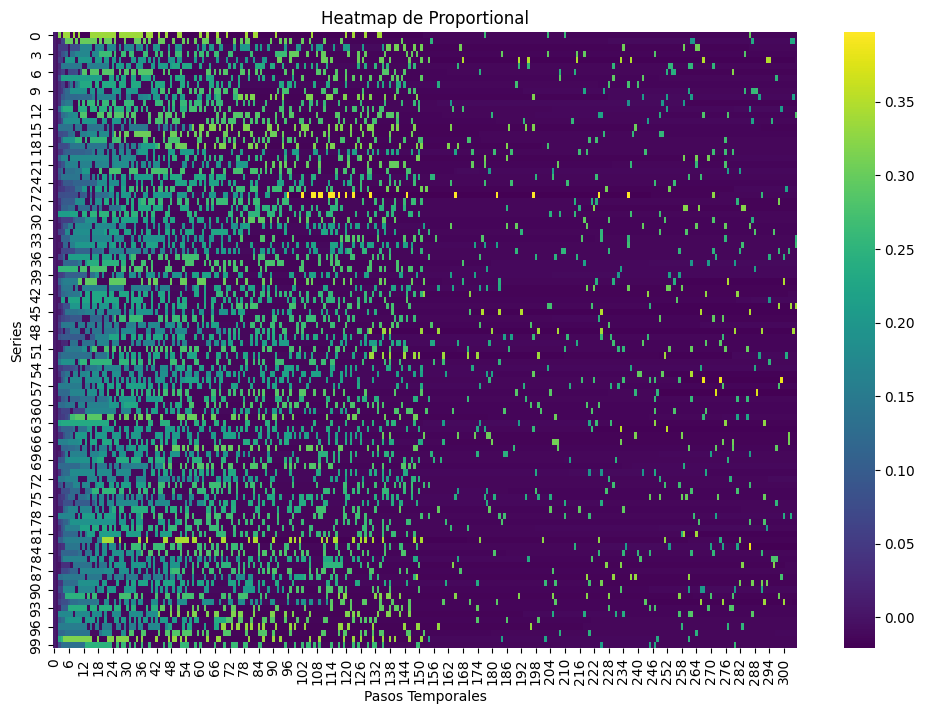

In [17]:
plot_heatmap(logs, component="proportional")

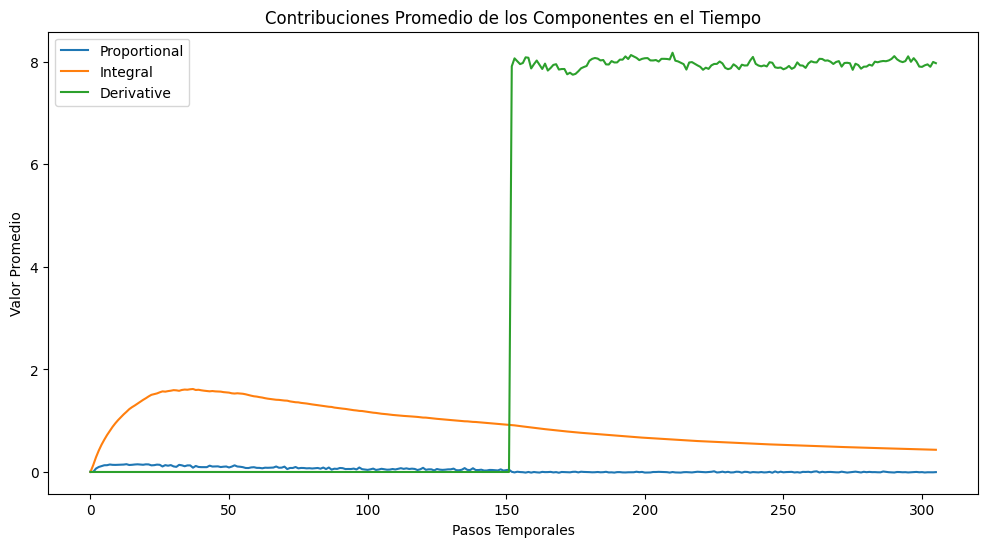

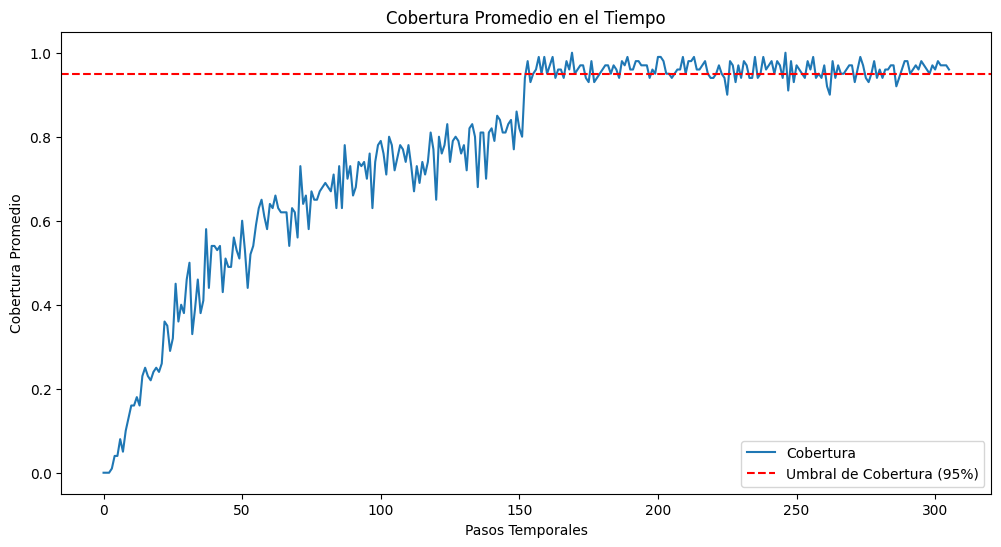

In [18]:
plot_logs_agg(aggregate_logs_average(logs))